In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator


import os
import zipfile
import matplotlib.image as mpimg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Using TensorFlow backend.


In [2]:
 #load data
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-04-25 07:29:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   204MB/s    in 0.3s    

2020-04-25 07:29:47 (204 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
#use zlib to uncpack - it will be unpaced in the content folder in colab. notive data are alreay splitted
#into train an validaion

local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall()
zip_.close()

In [0]:
#easier access to directories

base_dir = '/content/cats_and_dogs_filtered'

#os.os.path.join(base_dir, 'train') will join the drirectorie address /content/cats_and_dogs_filtered/train
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
#how to create a full path to the picture?
os.path.join( train_cats_dir, files[0])

'/content/cats_and_dogs_filtered/train/cats/cat.296.jpg'

In [0]:
#show some cats
files = os.listdir( train_cats_dir )
cats_files = [os.path.join( train_cats_dir, file) for file in files]

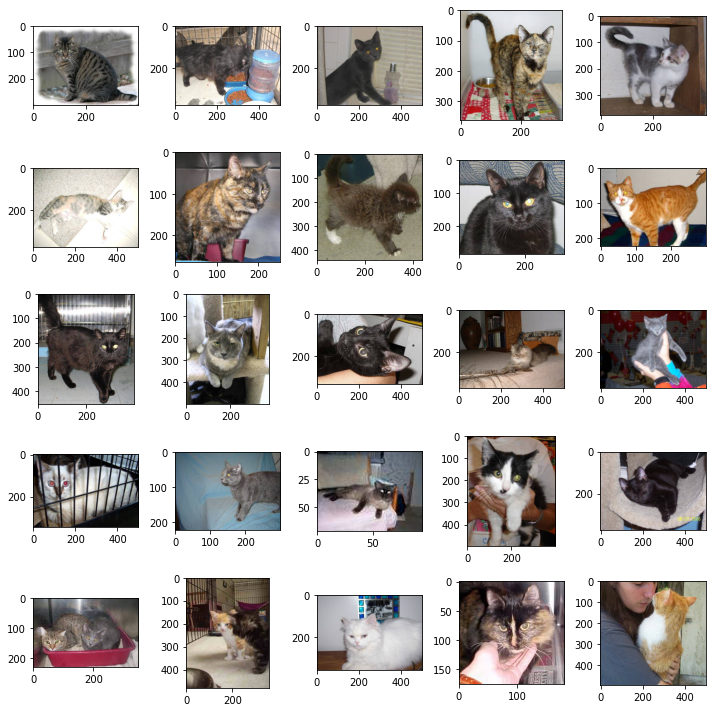

In [9]:
plt.figure(figsize=(10,10))
for idx in range(25):
  plt.subplot(5,5, idx + 1)
  img = mpimg.imread(cats_files[idx]) 
  plt.imshow(img)
  #plt.title('Picture_Title: {}'.format(files[idx]))

plt.tight_layout()

In [0]:
# show some dogs
files_dogs = os.listdir( train_dogs_dir )
dogs_files = [os.path.join( train_dogs_dir, file) for file in files_dogs]

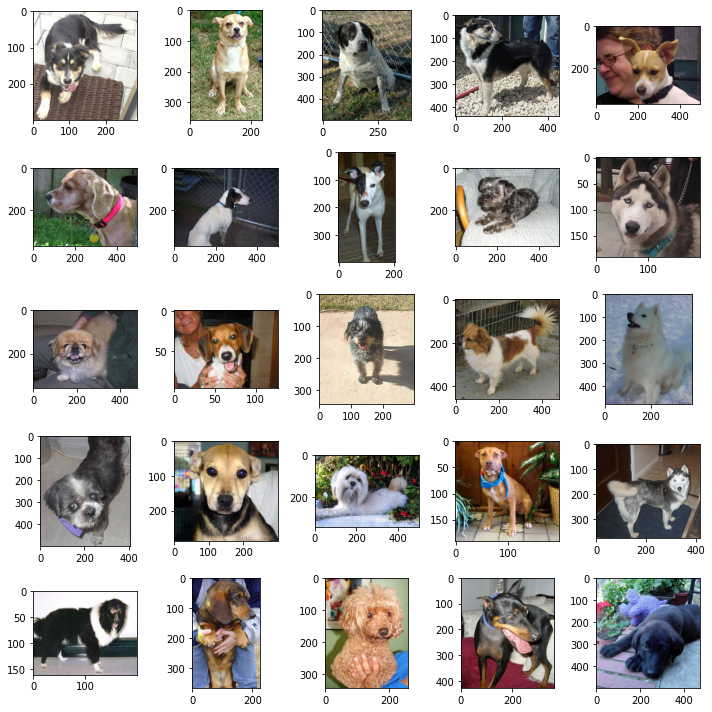

In [11]:
plt.figure(figsize=(10,10))
for idx in range(25):
  plt.subplot(5,5, idx + 1)
  img = mpimg.imread(dogs_files[idx]) 
  plt.imshow(img)
  #plt.title('Picture_Title: {}'.format(files[idx]))

plt.tight_layout()

In [25]:
#now its time to start buliding the model

input_shape = (150,150,3)

model = Sequential([
          Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
          Conv2D(32, (3,3), activation="relu"),
          MaxPool2D((2,2)),
          Dropout(0.25),
          
          Conv2D(64, (3,3), activation="relu"),
          Conv2D(64, (3,3), activation="relu"),
          MaxPool2D((2,2)),
          Dropout(0.25),

          Flatten(),

          Dense(64, activation="relu"),
          Dropout(0.5),
          Dense(1, activation= "sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 34, 34, 64)       

In [0]:
#photos are files in directory and we want to read them lets prepare the data

In [0]:
#data normalization

train_datgen = ImageDataGenerator(rescale = 1./255)
test_datgen = ImageDataGenerator(rescale = 1./255)

In [15]:
train_generator = train_datgen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = test_datgen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/50
 - 8s - loss: 0.6232 - accuracy: 0.6335 - val_loss: 0.7253 - val_accuracy: 0.6140
Epoch 2/50
 - 8s - loss: 0.6124 - accuracy: 0.6415 - val_loss: 0.5996 - val_accuracy: 0.6380
Epoch 3/50
 - 8s - loss: 0.6144 - accuracy: 0.6420 - val_loss: 0.7562 - val_accuracy: 0.6750
Epoch 4/50
 - 8s - loss: 0.5791 - accuracy: 0.6745 - val_loss: 0.6977 - val_accuracy: 0.6500
Epoch 5/50
 - 8s - loss: 0.5874 - accuracy: 0.6770 - val_loss: 0.5828 - val_accuracy: 0.6120
Epoch 6/50
 - 8s - loss: 0.5356 - accuracy: 0.7265 - val_loss: 0.5022 - val_accuracy: 0.7020
Epoch 7/50
 - 8s - loss: 0.4745 - accuracy: 0.7700 - val_loss: 0.5964 - val_accuracy: 0.6890
Epoch 8/50
 - 8s - loss: 0.4374 - accuracy: 0.7880 - val_loss: 0.4425 - val_accuracy: 0.7040
Epoch 9/50
 - 8s - loss: 0.3836 - accuracy: 0.8290 - val_loss: 0.5471 - val_accuracy: 0.6930
Epoch 10/50
 - 8s - loss: 0.3367 - accuracy: 0.8590 - val_loss: 0.5961 - val_accuracy: 0.7010
Epoch 11/50
 - 8s - loss: 0.2899 - accuracy: 0.8675 - val_loss: 1.281